# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{10} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* aaa
  * aaa
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 
df_chl_out_2D_3 = pd.read_csv('./data_collector_modisa_chla9km/df_chl_out_2D_modisa_3.csv', \
                              index_col='index')
df_chl_out_2D_3

,id,time,lat,var_tmp,var_lon,ve,spd,vn,var_lat,temp,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
10620,10206,2002-11-04,10.885583,1000.000000,0.001747,-6.069667,11.224333,6.904000,0.000579,NaN,67.315250,0.145567,-0.836937,0.017202,-1.764421,524.45200
10648,34721,2002-11-04,12.628833,0.001778,0.000122,6.291000,13.099250,-0.428083,0.000064,29.590750,67.626250,0.129693,-0.887083,-0.024359,NaN,509.24500
10879,10206,2002-11-07,11.064250,1000.000000,0.000558,-5.759333,10.497583,6.697417,0.000221,NaN,67.174083,0.129001,-0.889407,-0.016566,NaN,536.67500
10881,11089,2002-11-07,14.365167,0.003795,0.000151,-15.957833,16.718083,1.865000,0.000075,28.995083,64.770000,0.192121,-0.716425,0.033696,-1.472422,859.72600
10883,15707,2002-11-07,13.640333,1000.000000,0.000132,-15.104667,29.831500,-24.346083,0.000068,NaN,67.346250,0.158005,-0.801329,-0.008466,NaN,573.15900
10897,34315,2002-11-07,5.700083,0.004677,0.000116,-46.239333,53.404667,15.849750,0.000059,29.688667,57.189833,0.118153,-0.927555,-0.021739,NaN,807.01100
10901,34710,2002-11-07,17.340000,0.001818,0.000190,-2.268917,12.218750,11.470250,0.000091,28.845500,63.155917,0.375238,-0.425694,-0.069839,NaN,562.59100
10907,34721,2002-11-07,12.584833,0.001786,0.000096,11.166083,15.920500,-2.891250,0.000052,29.468167,67.824667,0.148202,-0.829147,0.018509,-1.732629,487.07000
11138,10206,2002-11-10,11.149750,1000.000000,0.002349,1.226750,2.176333,0.621000,0.000731,NaN,67.124333,0.125101,-0.902739,-0.003900,NaN,540.82800


In [3]:
check1 = df_chl_out_2D_3.chl_rate/ df_chl_out_2D_3.chlor_a 
check2 = df_chl_out_2D_3.chl_rate.divide(df_chl_out_2D_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_2D_3['chlor_a_log10_rate'] = pd.Series(np.array(check2), index=df_chl_out_2D_3.index)
df_chl_out_2D_3.head()

,id,time,lat,var_tmp,var_lon,ve,spd,vn,var_lat,temp,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
10620,10206,2002-11-04,10.885583,1000.000000,0.001747,-6.069667,11.224333,6.904000,0.000579,NaN,67.315250,0.145567,-0.836937,0.017202,-1.764421,524.452,0.118172
10648,34721,2002-11-04,12.628833,0.001778,0.000122,6.291000,13.099250,-0.428083,0.000064,29.590750,67.626250,0.129693,-0.887083,-0.024359,NaN,509.245,-0.187820
10879,10206,2002-11-07,11.064250,1000.000000,0.000558,-5.759333,10.497583,6.697417,0.000221,NaN,67.174083,0.129001,-0.889407,-0.016566,NaN,536.675,-0.128418
10881,11089,2002-11-07,14.365167,0.003795,0.000151,-15.957833,16.718083,1.865000,0.000075,28.995083,64.770000,0.192121,-0.716425,0.033696,-1.472422,859.726,0.175389
10883,15707,2002-11-07,13.640333,1000.000000,0.000132,-15.104667,29.831500,-24.346083,0.000068,NaN,67.346250,0.158005,-0.801329,-0.008466,NaN,573.159,-0.053581


In [5]:
df_chl_out_2D_3.chlor_a_log10_rate.describe()  # more scattered on the left hand side

count    739.000000
mean      -0.364358
std        2.274429
min      -31.284261
25%       -0.232512
50%       -0.012928
75%        0.179031
max        0.965572
Name: chlor_a_log10_rate, dtype: float64

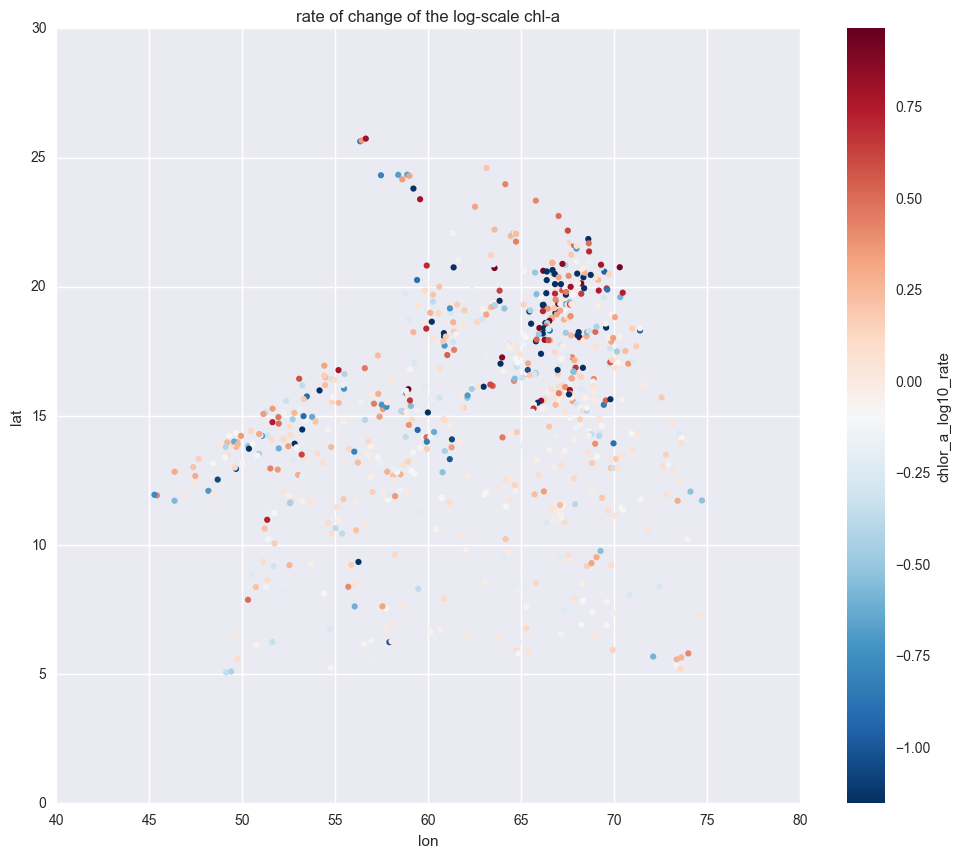

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_2D_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_log10_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

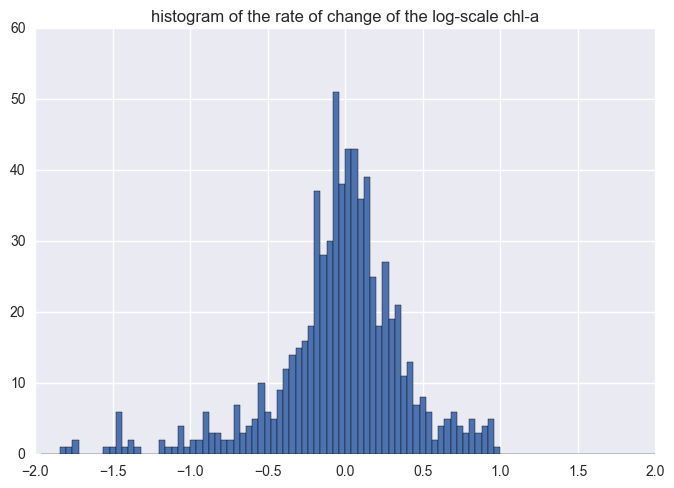

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_2D_3.chlor_a_log10_rate.dropna().hist(bins=100,range=[-2,2]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

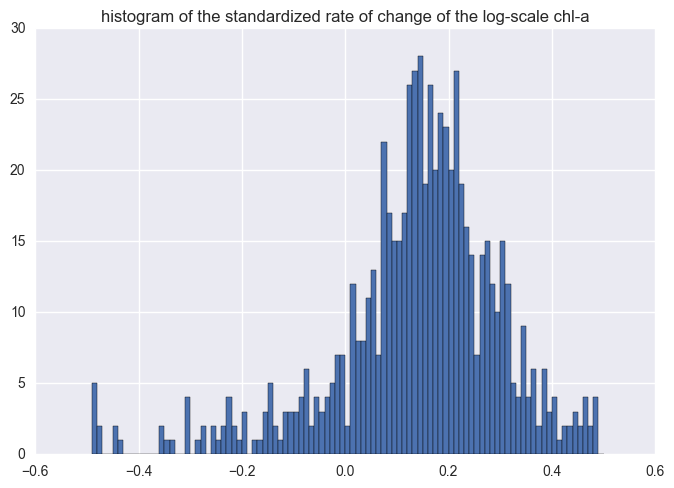

In [8]:
# standarized series
tmp = df_chl_out_2D_3.chlor_a_log10_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-0.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [9]:
# id:11089, time:2002-11-07"
# (0.194167 - 0.182671) / 0.194167    == 0.059207
df_chl_out_2D_3.sort_values(by=['id', 'time']).head()

,id,time,lat,var_tmp,var_lon,ve,spd,vn,var_lat,temp,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
10620,10206,2002-11-04,10.885583,1000.0,0.001747,-6.069667,11.224333,6.904000,0.000579,NaN,67.315250,0.145567,-0.836937,0.017202,-1.764421,524.452,0.118172
10879,10206,2002-11-07,11.064250,1000.0,0.000558,-5.759333,10.497583,6.697417,0.000221,NaN,67.174083,0.129001,-0.889407,-0.016566,NaN,536.675,-0.128418
11138,10206,2002-11-10,11.149750,1000.0,0.002349,1.226750,2.176333,0.621000,0.000731,NaN,67.124333,0.125101,-0.902739,-0.003900,NaN,540.828,-0.031175
12692,10206,2002-11-28,11.322667,1000.0,0.000845,-5.209000,5.937833,2.495417,0.000307,NaN,66.894750,0.132228,-0.878677,-0.001016,NaN,567.108,-0.007684
12951,10206,2002-12-01,11.384667,1000.0,0.003508,-11.984083,12.573333,3.490667,0.001023,NaN,66.684000,0.139830,-0.854400,0.007602,-2.119073,589.045,0.054366


In [10]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_2D_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_2D_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
df_chl_out_2D_3.to_csv('df_chl_out_2D_modisa_4.csv', sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv('df_chl_out_2D_modisa_4.csv', index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

,id,time,lat,var_tmp,var_lon,ve,spd,vn,var_lat,temp,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
10620,10206,2002-11-04,10.885583,1000.0,0.001747,-6.069667,11.224333,6.904000,0.000579,NaN,67.315250,0.145567,-0.836937,0.017202,-1.764421,524.452,0.118172
10879,10206,2002-11-07,11.064250,1000.0,0.000558,-5.759333,10.497583,6.697417,0.000221,NaN,67.174083,0.129001,-0.889407,-0.016566,NaN,536.675,-0.128418
11138,10206,2002-11-10,11.149750,1000.0,0.002349,1.226750,2.176333,0.621000,0.000731,NaN,67.124333,0.125101,-0.902739,-0.003900,NaN,540.828,-0.031175
12692,10206,2002-11-28,11.322667,1000.0,0.000845,-5.209000,5.937833,2.495417,0.000307,NaN,66.894750,0.132228,-0.878677,-0.001016,NaN,567.108,-0.007684
12951,10206,2002-12-01,11.384667,1000.0,0.003508,-11.984083,12.573333,3.490667,0.001023,NaN,66.684000,0.139830,-0.854400,0.007602,-2.119073,589.045,0.054366


In [11]:
print("test")

test
